In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### sklearn 
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline


## linear regression model
from sklearn.linear_model import LinearRegression, Lasso
#DecisionTreeRegressor model
from sklearn.tree import DecisionTreeRegressor
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
# Fine-Tune using GridSearchCV
from sklearn.model_selection import GridSearchCV

#cross-validation
from sklearn.model_selection import cross_val_score

import os

In [9]:
#importing data 
"D:\D\machinlearning\projects\Bigmart Sales"

train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [10]:
# shape of the data
train.shape, test.shape

((8523, 12), (5681, 11))

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [13]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


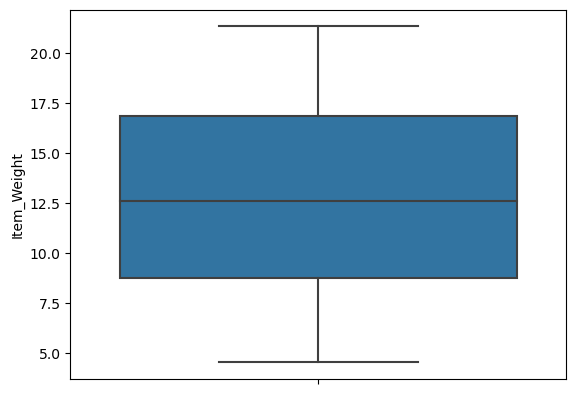

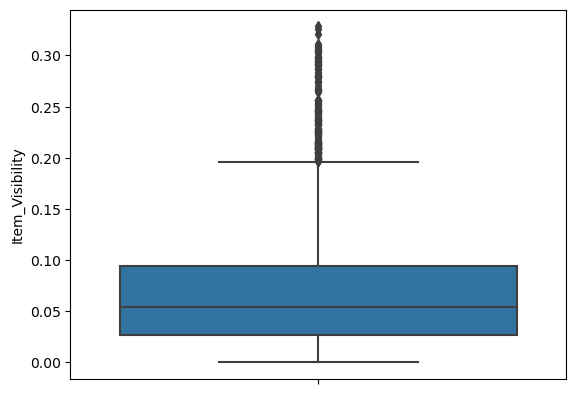

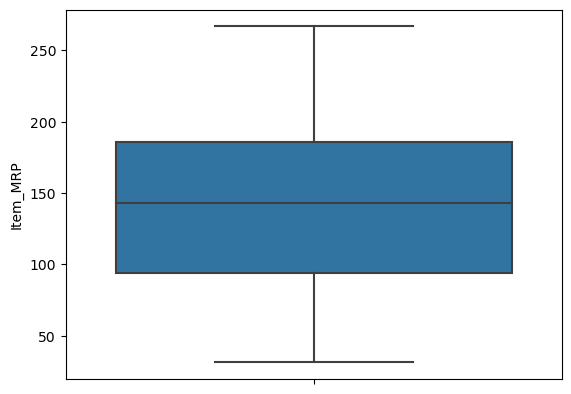

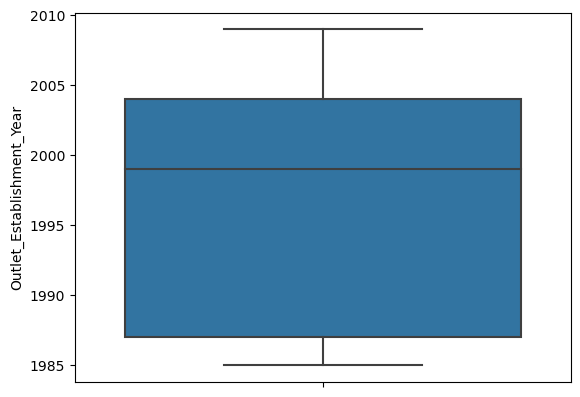

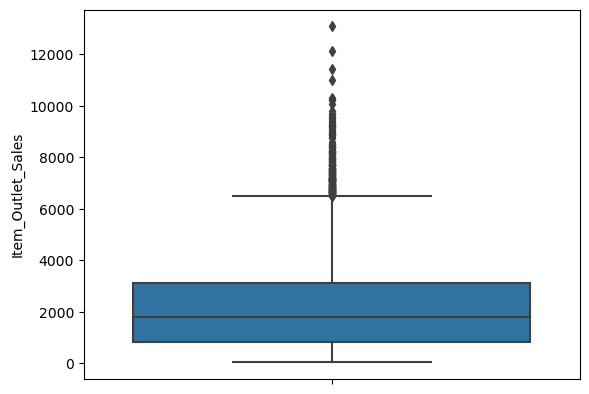

In [14]:
for i in train.select_dtypes(exclude='object'):
    sns.boxplot(y=train[i])
    plt.show()

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Count'>

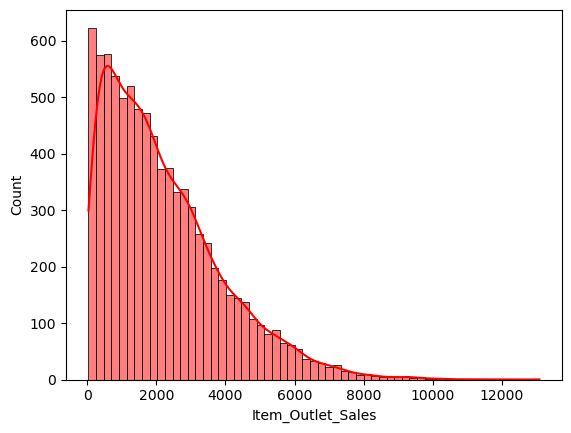

In [15]:
sns.histplot(train['Item_Outlet_Sales'], kde=True, color="red",)

In [16]:
train.describe(include='O')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [17]:
#chcking duplicates
print(train.duplicated().value_counts())
print(test.duplicated().value_counts())

False    8523
dtype: int64
False    5681
dtype: int64


In [18]:
#check the null values in "outlet_size"
train[train["Outlet_Size"].isnull() ==True]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [19]:
train[train["Outlet_Size"].isnull() ==True]['Outlet_Location_Type'].value_counts()

Tier 2    1855
Tier 3     555
Name: Outlet_Location_Type, dtype: int64

In [20]:
train[train["Outlet_Size"].isnull() ==True]['Outlet_Identifier'].value_counts()

OUT045    929
OUT017    926
OUT010    555
Name: Outlet_Identifier, dtype: int64

In [21]:
train[train["Outlet_Size"].isnull() ==True]['Outlet_Type'].value_counts()

Supermarket Type1    1855
Grocery Store         555
Name: Outlet_Type, dtype: int64

In [22]:
## for both ['OUT045', 'OUT017']
train[(train["Outlet_Location_Type"] =="Tier 2" ) & (train["Outlet_Type"] =="Supermarket Type1")]['Outlet_Size'].value_counts()

Small    930
Name: Outlet_Size, dtype: int64

In [23]:
train[(train['Outlet_Size'].isnull() ==True)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [24]:
## so for ['OUT010']
train[(train["Outlet_Location_Type"] =="Tier 3" ) & (train["Outlet_Type"] =="Grocery Store")]['Outlet_Size'].value_counts()

## there are no values have the both loctaion_type and type of the outlet so we should find any other column refer to it



Series([], Name: Outlet_Size, dtype: int64)

In [25]:
train[train["Outlet_Type"] == "Grocery Store"]['Outlet_Size'].value_counts()

Small    528
Name: Outlet_Size, dtype: int64

In [26]:
train[(train['Outlet_Location_Type'] == "Tier 3") ]['Outlet_Size'].value_counts()

Medium    1863
High       932
Name: Outlet_Size, dtype: int64

In [27]:
#so "Outlet_Size" of ['OUT045', 'OUT017'] will be >> "Small"
train.loc[(train['Outlet_Size'].isnull() ==True) &(train['Outlet_Identifier'] != 'OUT010'),"Outlet_Size"] = "Small"


## for other outlets identifier they will be "Medium"
train.loc[(train['Outlet_Size'].isnull() ==True) &(train['Outlet_Identifier'] == 'OUT010'),"Outlet_Size"] = "Medium"

<AxesSubplot:xlabel='Item_Weight', ylabel='Count'>

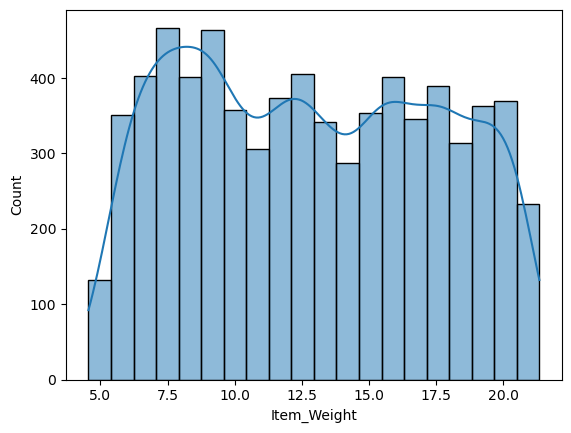

In [28]:
sns.histplot(train['Item_Weight'],kde=True)

In [29]:
train[train['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [30]:
### using sklearn preprocessing to impute null values with mean
imputer = SimpleImputer()
Item_Weight = imputer.fit_transform(train['Item_Weight'].values.reshape(-1,1))


<AxesSubplot:ylabel='Count'>

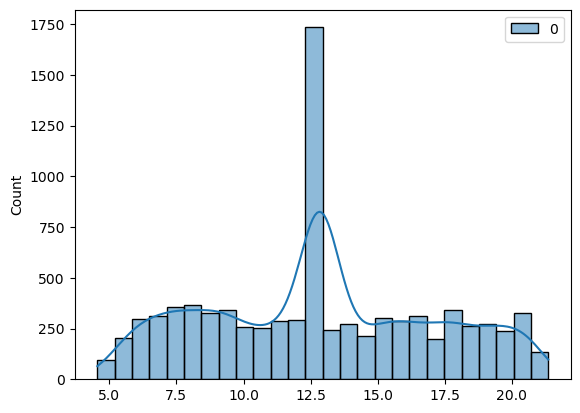

In [31]:
sns.histplot(Item_Weight,kde=True)

In [32]:
### tryin another approach for handling missing in item weights
cols = ['Item_Visibility','Item_MRP','Item_Weight']
x = train[cols]

impute_it = IterativeImputer()
x = impute_it.fit_transform(x)


In [33]:
## so we will go wtih the second approach
train['Item_Weight'] = x[:,2]
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [34]:
## change the minimum values of "Item_Visibility" by giving them mean value
train.loc[train['Item_Visibility']==0, 'Item_Visibility'] = train['Item_Visibility'].mean()

In [35]:
#extract number of years for each outlet 
train['Outlet_Age'] = 2019 - train['Outlet_Establishment_Year']
train['Outlet_Age']

0       20
1       10
2       20
3       21
4       32
        ..
8518    32
8519    17
8520    15
8521    10
8522    22
Name: Outlet_Age, Length: 8523, dtype: int64

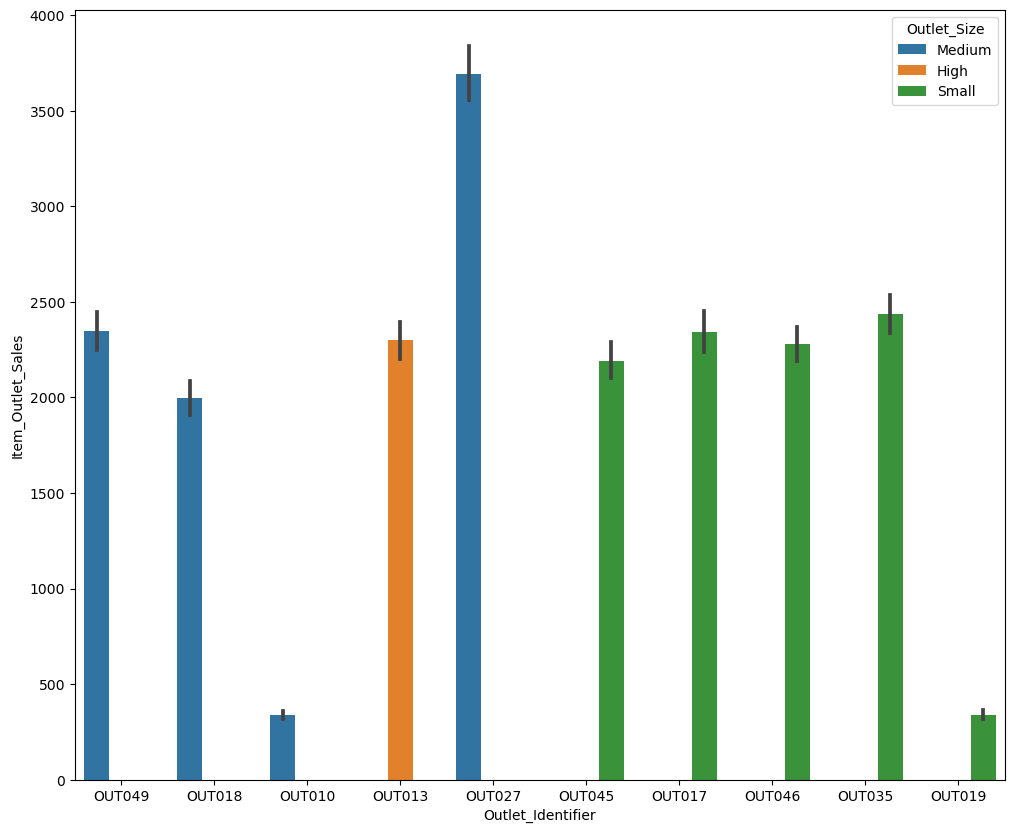

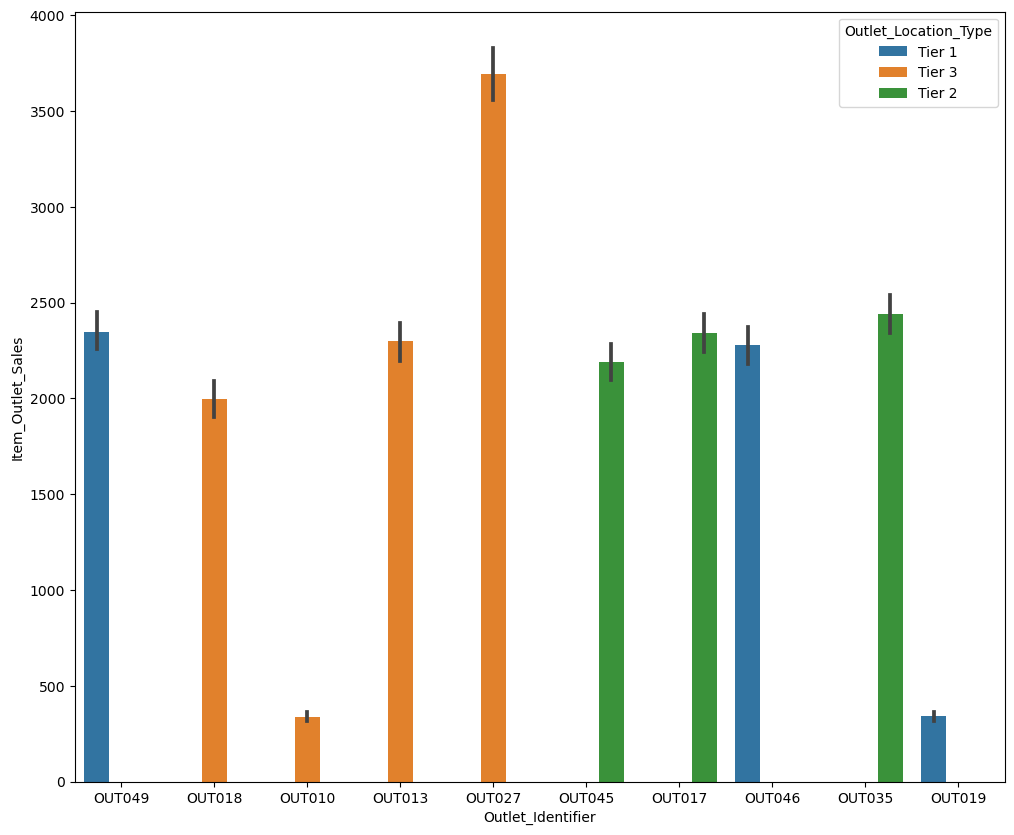

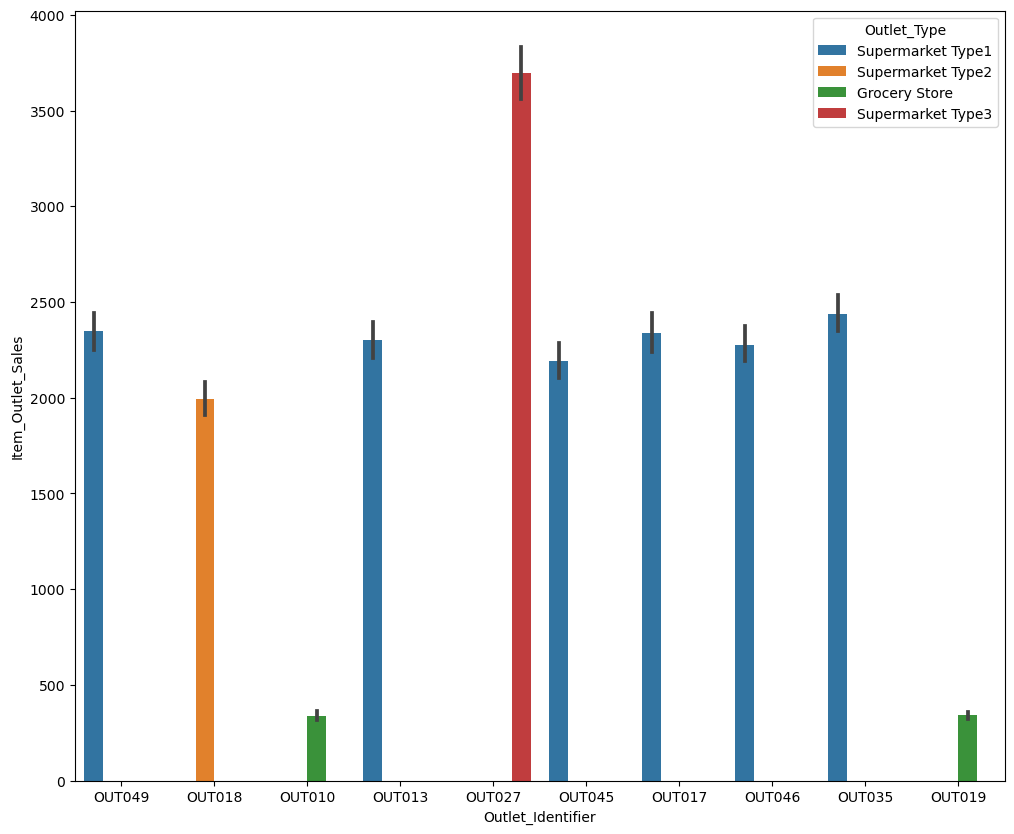

In [36]:
#showing the mean sales for each outlet with the other categories columns related to outlet
outlet_cols = ['Outlet_Size', 'Outlet_Location_Type','Outlet_Type']
for i in outlet_cols:
    plt.figure(figsize=(12,10))
    sns.barplot(x='Outlet_Identifier', y= 'Item_Outlet_Sales', hue=i,data=train)
    plt.show()

In [37]:
## check the age for every outlet
#df_out = train[["Outlet_Identifier",'Outlet_Age','Item_Outlet_Sales']]
#df_out.set_index('Outlet_Identifier')

df_out = train.groupby(['Outlet_Identifier','Outlet_Age'],as_index=False)['Item_Outlet_Sales'].mean().sort_values(by='Item_Outlet_Sales')
df_out.set_index('Outlet_Identifier',inplace=True)
#scaling mean sales by dividing on 100
df_out['Item_Outlet_Sales'] = df_out['Item_Outlet_Sales']/100

df_out

,Outlet_Age,Item_Outlet_Sales
Outlet_Identifier,,
OUT010,21,3.393517
OUT019,34,3.403297
OUT018,10,19.954987
OUT045,17,21.923848
OUT046,22,22.778443
OUT013,32,22.989953
OUT017,12,23.406753
OUT049,20,23.483546
OUT035,15,24.388419


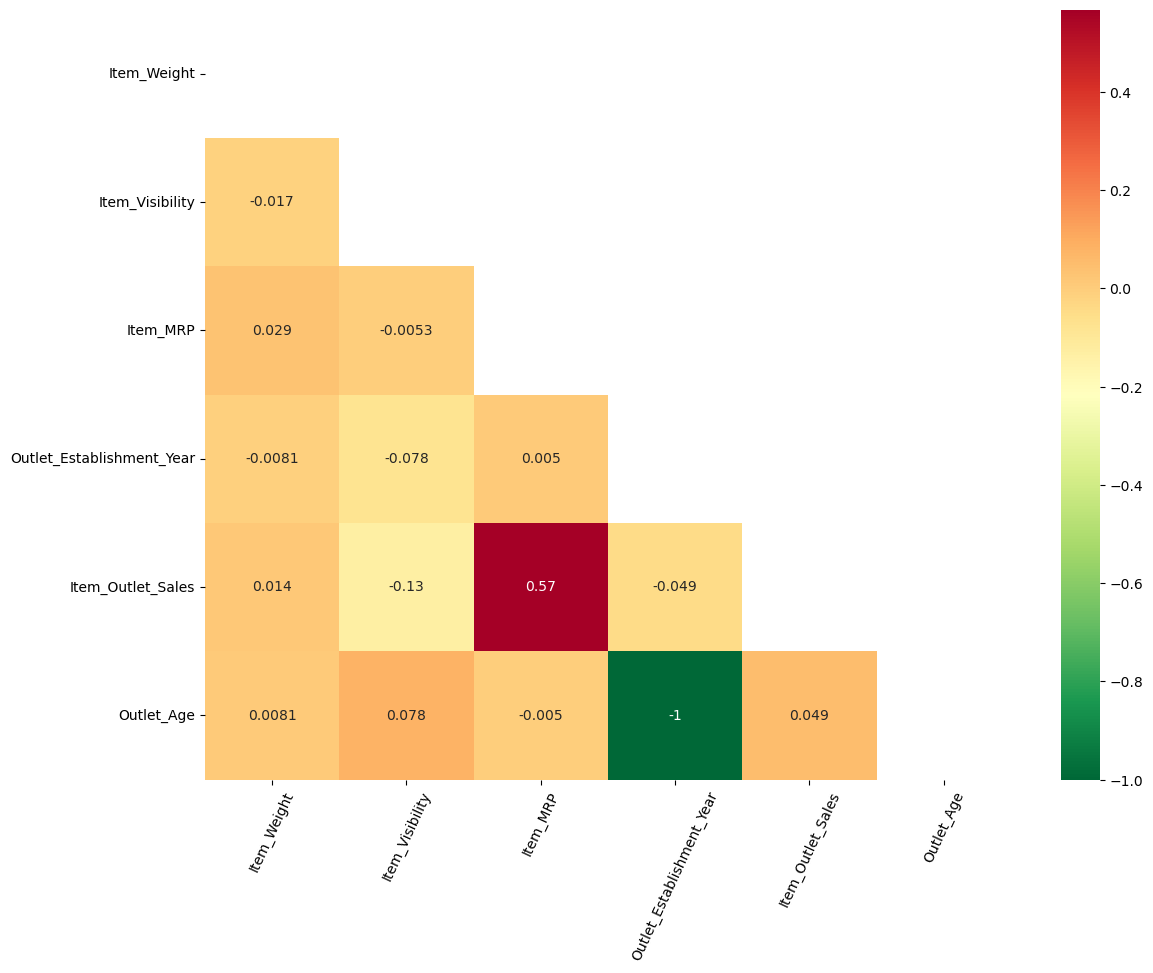

In [38]:
### check colleration for all columns
train_corr = train.corr()
mask = np.triu(np.ones_like(train_corr,dtype=bool))

plt.figure(figsize=(13,10))
sns.heatmap(train_corr, cmap='RdYlGn_r', mask=mask , annot=True)
plt.xticks(rotation=65)
plt.show()

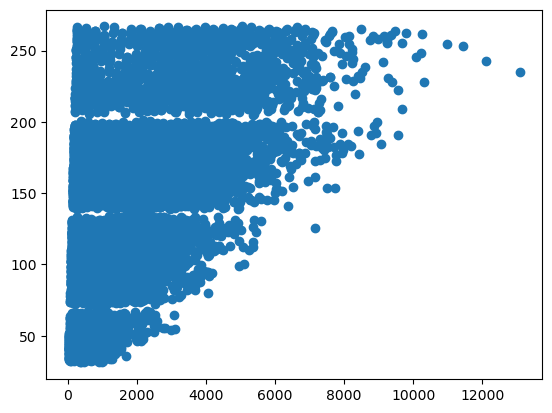

In [39]:
plt.scatter(train['Item_Outlet_Sales'], train['Item_MRP'])

In [40]:
### changing outliers to lower and maximum values
upper = train['Item_Outlet_Sales'].quantile(0.95)
lower = train['Item_Outlet_Sales'].quantile(0.05)

train['Item_Outlet_Sales'] = train['Item_Outlet_Sales'].apply(lambda x: upper if x >upper 
                                                              else(lower if x < lower else x))

<AxesSubplot:ylabel='Item_Outlet_Sales'>

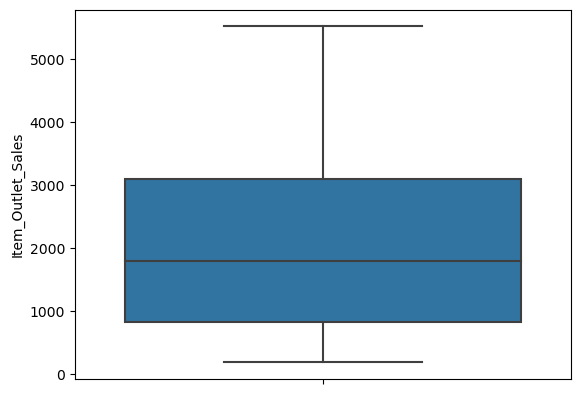

In [41]:
## visualising the sales after getting rid of outliers
sns.boxplot(y='Item_Outlet_Sales',data=train)

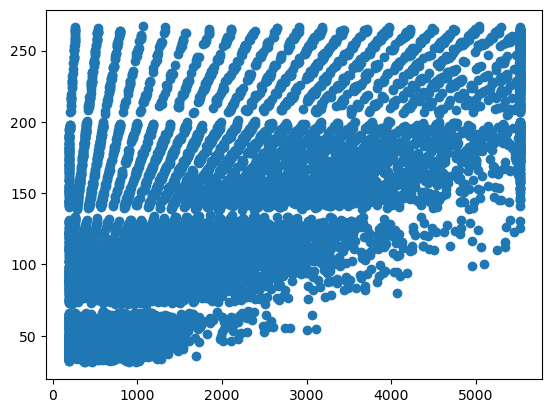

In [42]:
plt.scatter(train['Item_Outlet_Sales'], train['Item_MRP'])

In [43]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,20
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,10
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,20
3,FDX07,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,21
4,NCD19,8.930,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,32
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850,17
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,15
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,10


In [44]:
for i in train.columns:
    print(i)
    print(train[i].value_counts())
    print("*********************\n")


Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
*********************

Item_Weight
12.150000    86
17.600000    82
13.650000    77
11.800000    76
9.300000     68
             ..
12.857600     1
12.953250     1
12.785437     1
12.692389     1
12.805120     1
Name: Item_Weight, Length: 1878, dtype: int64
*********************

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
*********************

Item_Visibility
0.066132    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64
*********************

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910


In [45]:
## adjusting values of fat_content
train['Item_Fat_Content']= train['Item_Fat_Content'].apply(lambda x: "Regular" if x=='reg' or x == 'Regular' else 'Low Fat')


In [46]:
## item identifier classification
train['Item_Identifier'].str[:2].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64

In [47]:
## exctracting items_type_classification column from Item_identitfier
train['Item_ID_Type']=train['Item_Identifier'].apply(lambda x: "Food" if x[:2] =='FD' 
                                               else( "Drink" if x[:2]=='DR' else "Non-Consumable") )
train['Item_ID_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drink              799
Name: Item_ID_Type, dtype: int64

In [48]:
## delete "Outlet_Establishment_Year" column
train.drop(columns=['Outlet_Establishment_Year','Item_Type'], inplace=True)

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       8523 non-null   object 
 1   Item_Weight           8523 non-null   float64
 2   Item_Fat_Content      8523 non-null   object 
 3   Item_Visibility       8523 non-null   float64
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Identifier     8523 non-null   object 
 6   Outlet_Size           8523 non-null   object 
 7   Outlet_Location_Type  8523 non-null   object 
 8   Outlet_Type           8523 non-null   object 
 9   Item_Outlet_Sales     8523 non-null   float64
 10  Outlet_Age            8523 non-null   int64  
 11  Item_ID_Type          8523 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [50]:
### using labelEncoder for ['Item_Identifier','Outlet_Identifier']
lencod = LabelEncoder()
ids = ['Item_Identifier','Outlet_Identifier','Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_ID_Type']
for i in ids:
    train[i]=lencod.fit_transform(train[i])
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_ID_Type
0,156,9.300,0,0.016047,249.8092,9,1,0,1,3735.1380,20,1
1,8,5.920,1,0.019278,48.2692,3,1,2,2,443.4228,10,0
2,662,17.500,0,0.016760,141.6180,9,1,0,1,2097.2700,20,1
3,1121,19.200,1,0.066132,182.0950,0,1,2,0,732.3800,21,1
4,1297,8.930,0,0.066132,53.8614,1,0,2,1,994.7052,32,2
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,214.5218,1,0,2,1,2778.3834,32,1
8519,897,8.380,1,0.046982,108.1570,7,2,1,1,549.2850,17,1
8520,1357,10.600,0,0.035186,85.1224,6,2,1,1,1193.1136,15,2
8521,681,7.210,1,0.145221,103.1332,3,1,2,2,1845.5976,10,1


In [51]:
### using get_dummies to make one hot encoding for ther other categorical columns
lb = OneHotEncoder()
cat_cols = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_ID_Type']

train = pd.get_dummies(train,columns=cat_cols)
    
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Item_Identifier         8523 non-null   int32  
 1   Item_Weight             8523 non-null   float64
 2   Item_Visibility         8523 non-null   float64
 3   Item_MRP                8523 non-null   float64
 4   Outlet_Identifier       8523 non-null   int32  
 5   Item_Outlet_Sales       8523 non-null   float64
 6   Outlet_Age              8523 non-null   int64  
 7   Item_Fat_Content_0      8523 non-null   uint8  
 8   Item_Fat_Content_1      8523 non-null   uint8  
 9   Outlet_Size_0           8523 non-null   uint8  
 10  Outlet_Size_1           8523 non-null   uint8  
 11  Outlet_Size_2           8523 non-null   uint8  
 12  Outlet_Location_Type_0  8523 non-null   uint8  
 13  Outlet_Location_Type_1  8523 non-null   uint8  
 14  Outlet_Location_Type_2  8523 non-null   

In [52]:
def pipline(in_df):
    #so "Outlet_Size" of ['OUT045', 'OUT017'] will be >> "Small" and last one will be  'Medium'
    in_df.loc[(in_df['Outlet_Size'].isnull() ==True) &(in_df['Outlet_Identifier'] != 'OUT010'),"Outlet_Size"] = "Small"
    in_df.loc[(in_df['Outlet_Size'].isnull() ==True) &(in_df['Outlet_Identifier'] == 'OUT010'),"Outlet_Size"] = "Medium"
    
    ### tryin another approach for handling missing in item weights
    cols = ['Item_Visibility','Item_MRP','Item_Weight']
    x = in_df[cols]
    impute_it = IterativeImputer()
    x = impute_it.fit_transform(x)
    in_df['Item_Weight'] = x[:,2]
    
    ## change the minimum values of "Item_Visibility" by giving them mean value
    in_df.loc[in_df['Item_Visibility']==0, 'Item_Visibility'] = in_df['Item_Visibility'].mean()
    
    #extract number of years for each outlet 
    in_df['Outlet_Age'] = 2019 - in_df['Outlet_Establishment_Year']
    

    ## adjusting values of fat_content
    in_df['Item_Fat_Content']= in_df['Item_Fat_Content'].apply(lambda x: "Regular" if x=='reg' or x == 'Regular' else 'Low Fat')
    
    ## exctracting items_type_classification column from Item_identitfier
    in_df['Item_ID_Type']=in_df['Item_Identifier'].apply(lambda x: "Food" if x[:2] =='FD' 
                                               else( "Drink" if x[:2]=='DR' else "Non-Consumable") )
    
    ## delete "Outlet_Establishment_Year" and 'Item_Type' columns
    in_df.drop(columns=['Outlet_Establishment_Year','Item_Type'], inplace=True)
    
    
    
    #start encoding columns
    ##start with labelencoding
    ids = ['Item_Identifier','Outlet_Identifier','Item_Fat_Content','Outlet_Size'
           ,'Outlet_Location_Type','Outlet_Type','Item_ID_Type']
    for i in ids:
        in_df[i]=lencod.fit_transform(in_df[i])
        
    
    ### using get_dummies to make one hot encoding for ther other categorical columns
    cat_cols = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_ID_Type']
    in_df = pd.get_dummies(in_df,columns=cat_cols)
    
    out_df = in_df.copy()
    return out_df

In [53]:
mod_test = pipline(test)
mod_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Item_Identifier         5681 non-null   int32  
 1   Item_Weight             5681 non-null   float64
 2   Item_Visibility         5681 non-null   float64
 3   Item_MRP                5681 non-null   float64
 4   Outlet_Identifier       5681 non-null   int32  
 5   Outlet_Age              5681 non-null   int64  
 6   Item_Fat_Content_0      5681 non-null   uint8  
 7   Item_Fat_Content_1      5681 non-null   uint8  
 8   Outlet_Size_0           5681 non-null   uint8  
 9   Outlet_Size_1           5681 non-null   uint8  
 10  Outlet_Size_2           5681 non-null   uint8  
 11  Outlet_Location_Type_0  5681 non-null   uint8  
 12  Outlet_Location_Type_1  5681 non-null   uint8  
 13  Outlet_Location_Type_2  5681 non-null   uint8  
 14  Outlet_Type_0           5681 non-null   

In [54]:
# split target vector
y = train['Item_Outlet_Sales'].copy()
X = train.drop(columns='Item_Outlet_Sales')

### first will split train to 4 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=20)

X_train.shape , y_train.shape

((5710, 21), (5710,))

In [55]:

lg = LinearRegression()

lg.fit(X_train, y_train)

LinearRegression()

In [56]:
#checking the score
print(f"Linear Regression Score: {lg.score(X_train, y_train)}")

Linear Regression Score: 0.5843561430591684


In [57]:
y_pred = lg.predict(X_test)
y_pred

array([1763.40401928, 3562.18926438,  953.79864805, ..., 1959.88160708,
       3085.52871401, 2338.45946117])

In [58]:
y_test

3325     998.7000
3504    4122.6336
2244     188.4214
2783    2680.5108
3326    3478.8050
          ...    
7721    1155.8288
6053    2570.6538
7022    2073.3012
4543    5195.2374
1261    2681.8424
Name: Item_Outlet_Sales, Length: 2813, dtype: float64

In [60]:
# checking the mean squared error and root mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Mean Squared Error for Regression: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error for Regression: 977083.2100553428
Root Mean Squared Error: 988.4751944562609


In [61]:
tree_reg =DecisionTreeRegressor()

tree_reg.fit(X_train, y_train)

#checking score 
tree_reg.score(X_train, y_train)

1.0

In [62]:
y_pred_tree = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, y_pred_tree)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

1390.0539715279194

In [63]:
forest_reg = RandomForestRegressor()

forest_reg.fit(X_train, y_train)

#checking score
print(f"score of Random Forest Regressor model: {forest_reg.score(X_train, y_train)}")


score of Random Forest Regressor model: 0.9403830808822927


In [64]:
y_pred_forest = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, y_pred_forest)
forest_rmse = np.sqrt(forest_mse)

print(f"Root Mean Squared Error: {forest_rmse}")

Root Mean Squared Error: 997.9708221989948


In [65]:
lrg_scores = cross_val_score(lg, X_train, y_train,scoring="neg_mean_squared_error", cv=10)
lrg_rmse_scores = np.sqrt(-lrg_scores)

In [66]:
tree_scores = cross_val_score(tree_reg, X_train, y_train,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)


In [67]:
def display_scores(scores):
    print("Scores: ", scores)
    print("\nMean: ", scores.mean())
    print("Standard deviation: ", scores.std())


In [68]:
#showing scores of linear regression model
display_scores(lrg_rmse_scores)

Scores:  [1027.41493092  916.72664029 1000.32699825 1044.47147733 1014.83861537
  979.39609179  984.62652956 1059.97915986 1011.49593858  982.09665094]

Mean:  1002.1373032899116
Standard deviation:  38.14368192383565


In [69]:
#showing scores of  model DecisionTreeRegressor
display_scores(tree_rmse_scores)

Scores:  [1395.7042748  1301.59523577 1415.7389284  1329.29332989 1417.34826139
 1393.78227474 1395.16283607 1421.38588677 1478.81824036 1311.10097228]

Mean:  1385.993024047327
Standard deviation:  52.84209772500176


In [70]:
# get the scores validation using cross-validation
forest_scores = cross_val_score(forest_reg, X_train, y_train,scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
# scores for RandomForestRegressor
display_scores(forest_rmse_scores)

Scores:  [1044.94710326  906.33236892 1011.12458476 1062.62813563 1031.99720048
  992.90019257 1002.31944496 1072.65904215 1063.11025191 1022.13464114]

Mean:  1021.0152965767677
Standard deviation:  46.103438731926374


In [71]:
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [72]:
#### now showing the best combinations parameters
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [73]:
#showing the error score 
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1183.8457613425014 {'max_features': 2, 'n_estimators': 3}
1072.5363043330553 {'max_features': 2, 'n_estimators': 10}
1037.4180431192872 {'max_features': 2, 'n_estimators': 30}
1158.6923062874669 {'max_features': 4, 'n_estimators': 3}
1041.4537494801018 {'max_features': 4, 'n_estimators': 10}
1018.8120498655177 {'max_features': 4, 'n_estimators': 30}
1129.6899667530886 {'max_features': 6, 'n_estimators': 3}
1036.9676833830333 {'max_features': 6, 'n_estimators': 10}
1013.1122024679895 {'max_features': 6, 'n_estimators': 30}
1137.079528186271 {'max_features': 8, 'n_estimators': 3}
1045.68167148236 {'max_features': 8, 'n_estimators': 10}
1011.1615279303503 {'max_features': 8, 'n_estimators': 30}
1188.364771339751 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
1091.7913101681377 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
1196.578844323642 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
1091.54253104391 {'bootstrap': False, 'max_features': 3, 'n_estima

In [74]:
### first we will scaling the test data
scaler = StandardScaler()
scaler.fit(mod_test)
stnd_test = scaler.transform(mod_test)
stnd_test = pd.DataFrame(data =stnd_test, columns=mod_test.columns )


In [75]:
##with mod_test data
predicted = lg.predict(stnd_test)

predicted

array([3663.96796766, 2589.31215133, 1974.10617106, ..., 2794.51460136,
       2721.36331626, 3006.77388869])

In [76]:
stnd_test

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Age,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_ID_Type_0,Item_ID_Type_1,Item_ID_Type_2
0,0.739896,1.896764,-1.285395,-0.536555,1.507689,-0.139891,0.740811,-0.740811,-0.350325,1.243081,...,1.602644,-0.696584,-0.804750,-0.381568,0.726900,-0.349374,-0.351274,-0.316748,0.627510,-0.486429
1,0.659085,-1.035566,-0.647603,-0.868937,-0.959749,-1.095512,-1.349873,1.349873,-0.350325,-0.804453,...,-0.623969,1.435578,-0.804750,-0.381568,0.726900,-0.349374,-0.351274,-0.316748,0.627510,-0.486429
2,1.420050,0.448264,0.616028,1.629848,-1.664731,-0.020438,0.740811,-0.740811,-0.350325,1.243081,...,-0.623969,-0.696584,1.242623,2.620767,-1.375706,-0.349374,-0.351274,-0.316748,-1.593601,2.055799
3,0.079943,-1.267561,-1.123718,0.226697,-0.959749,-1.095512,0.740811,-0.740811,-0.350325,-0.804453,...,-0.623969,1.435578,-0.804750,-0.381568,0.726900,-0.349374,-0.351274,-0.316748,0.627510,-0.486429
4,0.921719,0.076587,1.009174,1.508110,0.097725,1.532446,-1.349873,1.349873,-0.350325,1.243081,...,-0.623969,-0.696584,1.242623,-0.381568,-1.375706,-0.349374,2.846782,-0.316748,0.627510,-0.486429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,-1.217514,-0.517403,-1.162816,0.004727,1.155198,0.099015,-1.349873,1.349873,-0.350325,-0.804453,...,1.602644,-0.696584,-0.804750,-0.381568,0.726900,-0.349374,-0.351274,-0.316748,0.627510,-0.486429
5677,-1.049159,-1.200436,1.513236,0.455014,-0.607258,-1.334417,-1.349873,1.349873,-0.350325,1.243081,...,-0.623969,-0.696584,1.242623,-0.381568,-1.375706,2.862264,-0.351274,-0.316748,0.627510,-0.486429
5678,1.433519,-0.635167,0.077770,-0.360485,0.802707,-0.498248,0.740811,-0.740811,-0.350325,-0.804453,...,-0.623969,1.435578,-0.804750,-0.381568,0.726900,-0.349374,-0.351274,-0.316748,-1.593601,2.055799
5679,-0.575520,0.613134,-0.084344,1.190844,-0.959749,-1.095512,-1.349873,1.349873,-0.350325,-0.804453,...,-0.623969,1.435578,-0.804750,-0.381568,0.726900,-0.349374,-0.351274,-0.316748,0.627510,-0.486429


<AxesSubplot:>

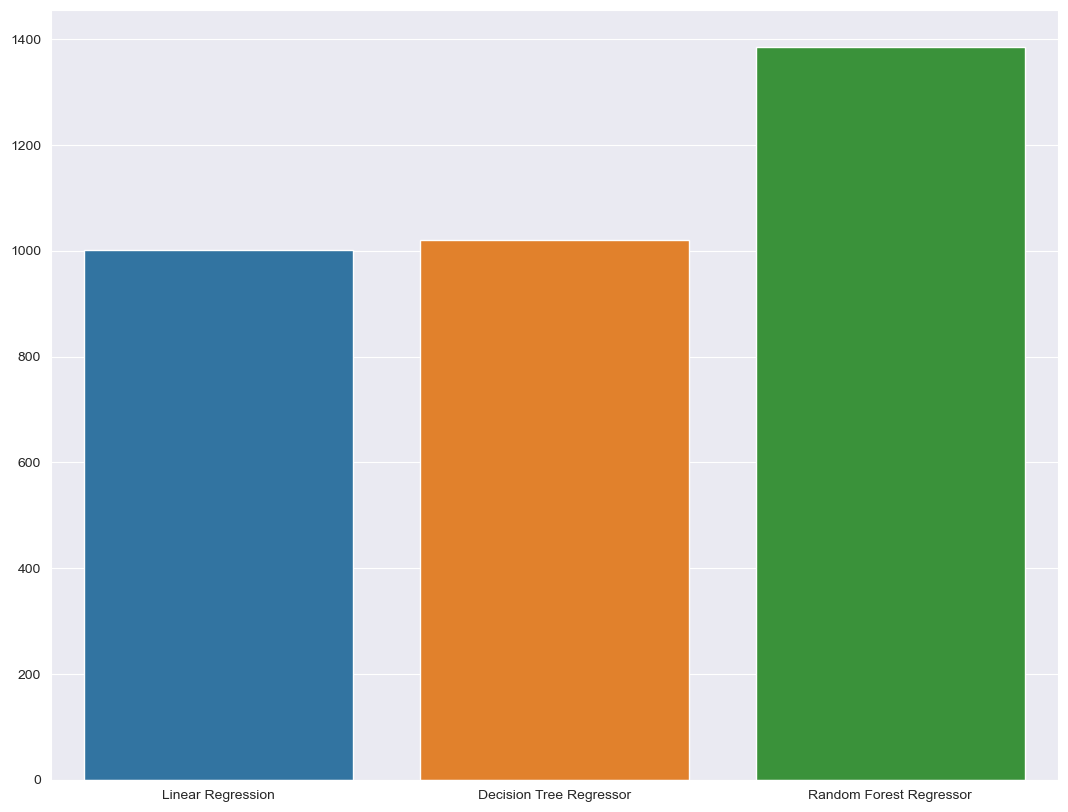

In [78]:
model_scores = sorted([lrg_rmse_scores.mean(), tree_rmse_scores.mean(), forest_rmse_scores.mean()])
plt.figure(figsize=(13,10))


sns.set_style("darkgrid")
sns.barplot(x=['Linear Regression','Decision Tree Regressor','Random Forest Regressor'],y=model_scores,)